In [13]:
# load data we want to use from sklearn
import sklearn.datasets as ds
iris = ds.load_irisu()
x = iris.data[:,[2,3]]
y = iris.target
# Separate data to training and test
from sklearn.model_selection import train_test_split as tts
#from sklearn.linear_model.LogisticRgression import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)
# Standardize the data using sklearn.preprocessing
from sklearn.preprocessing import StandardScaler as sc
sc0 = sc()
sc0.fit(xtrain)
xtr_std=sc0.transform(xtrain)
xte_std=sc0.transform(xtest)

## 2. Import LR model

In [14]:
from sklearn.linear_model import LogisticRegression as lr
# C is the inverse of the regularization parameter.
lr0=lr(C=1000.0, random_state=None, solver='newton-cg');
lr0.fit (xtr_std, ytrain)
# predict on the test data
ypd = lr0.predict (xte_std)

## 3. Let's see how accurate this is
sci-kit learn provides functionalities to measure the accuracy of the classfication results

In [15]:
#print (ytest)
#help ('sklearn.linear_model.LogisticRegression.score')
# old way to calculate the score
#from sklearn.metrics import accuracy_score as acs
#acc = acs (ytest, ypd)
acc = lr0.score(xte_std,ytest)
print ("accuracy is: ", acc)

accuracy is:  0.933333333333


## 4. Let's visualize

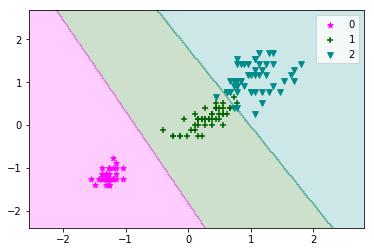

In [16]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_dc_bd (x, y, classifier, test_idx=None, num=200):
    markers=('*','+','v','h','s')
    colors=('magenta','DarkGreen','DarkCyan','blue','red')
    cmp=ListedColormap(colors[:len(np.unique(y))])
    xmin1,xmax1=x[:,0].min()-1.0,x[:,0].max()+1.0
    xmin2,xmax2=x[:,1].min()-1.0,x[:,1].max()+1.0
    [xx1,xx2]=np.meshgrid(np.linspace(xmin1,xmax1,num),
                          np.linspace(xmin2,xmax2,num))
    z0=classifier.predict (np.array([xx1.ravel(),xx2.ravel()]).T)
    z=np.reshape(z0,
                 np.shape(xx1))
    plt.contourf(xx1,xx2,z,cmap=cmp,alpha=0.2)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
#     plt.scatter (x[:,0],x[:,1],marker='o',
#                  label='Data',edgecolor='r',
#                  facecolor='none',s=51)

    for idx, val in enumerate(np.unique(y)):
        plt.scatter(x[y==val,0],x[y==val,1],c=colors[idx],
                    marker=markers[idx],label=str(val),s=33)
        #print ("id ",idx,", val ",x[y==val,0])
    plt.legend(loc=0)
    plt.show()

# now let's see the pic
plot_dc_bd(np.concatenate((xtr_std,xte_std)),
           np.concatenate((ytrain,ytest)),lr0)

In [17]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>